In [2]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

C:\Users\sba\miniconda3\envs\album\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [49]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, pic_w, pic_h, color=BOX_COLOR, thickness=2):
    dataType = "yolo"

    """Visualizes a single bounding box on the image"""

    if dataType == 'coco':
        x_min, y_min, w, h = bbox # 정규화 된 0~1 사이의 값
        x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    elif dataType == "yolo":
        x_center, y_center, w, h = bbox
        # 픽셀 좌표로 변환 이미지의 width와 height값
        x_min = int(float(x_center - w/2) * pic_w)
        x_max = int(float(x_center + w/2) * pic_w)
        y_min = int(float(y_center - h/2) * pic_h)
        y_max = int(float(y_center + h/2) * pic_h)
    print(w, h)
    print(x_min, y_min, y_min, y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name, img_shape):
    img = image.copy()
    h,w = img_shape[0:2]
    print(bboxes)
    print(category_ids)
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, w, h)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [42]:
imgFile ='000000386298.jpg'
image = cv2.imread(imgFile)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_shape = image.shape
image

array([[[ 89,  78,  60],
        [ 35,  28,  10],
        [ 35,  34,  16],
        ...,
        [ 85,  85,  77],
        [ 83,  82,  77],
        [ 82,  81,  76]],

       [[125, 114,  96],
        [ 94,  85,  68],
        [ 51,  50,  32],
        ...,
        [110,  97,  91],
        [108,  95,  89],
        [107,  93,  90]],

       [[105,  92,  76],
        [130, 121, 104],
        [109, 106,  89],
        ...,
        [144, 119, 112],
        [142, 117, 112],
        [140, 115, 110]],

       ...,

       [[148, 143, 137],
        [165, 160, 154],
        [165, 160, 154],
        ...,
        [199, 182, 174],
        [197, 180, 172],
        [193, 176, 168]],

       [[107, 107, 105],
        [ 84,  84,  82],
        [137, 137, 135],
        ...,
        [207, 190, 182],
        [207, 190, 182],
        [203, 186, 178]],

       [[102, 110, 112],
        [137, 142, 145],
        [ 86,  91,  94],
        ...,
        [195, 178, 170],
        [198, 181, 173],
        [194, 177, 169]]

In [46]:
f=open('000000386298.txt','r')
while True:
    line = f.readline()
    if not line: break
    print(line.split()[0])
    print(line.split()[1:])
    print(line)
f.close()

0
['0.151059', '0.598563', '0.288740', '0.433265']
0 0.151059 0.598563 0.288740 0.433265

1
['0.870123', '0.443532', '0.250836', '0.509240']
1 0.870123 0.443532 0.250836 0.509240



In [47]:
category_id_to_name = {0:'cat', 1:'dog'}
category_ids = []
bboxes = []

f=open('000000386298.txt','r')
while True:
    line = f.readline()
    if not line: break
    ids, xc, yc, w, h = line.split()
    category_ids.append(int(ids))
    bboxes.append([float(xc), float(yc), float(w), float(h)])
f.close()

In [17]:
print(category_ids) # [] 1차원
print(bboxes) # [[]] 2차원

[0, 1]
[[0.153846, 0.598563, 0.303233, 0.449692], [0.867893, 0.442505, 0.259755, 0.519507]]


[[0.151059, 0.598563, 0.28874, 0.433265], [0.870123, 0.443532, 0.250836, 0.50924]]
[0, 1]
0.28874 0.433265
2 143 143 407
0.250836 0.50924
279 70 70 349


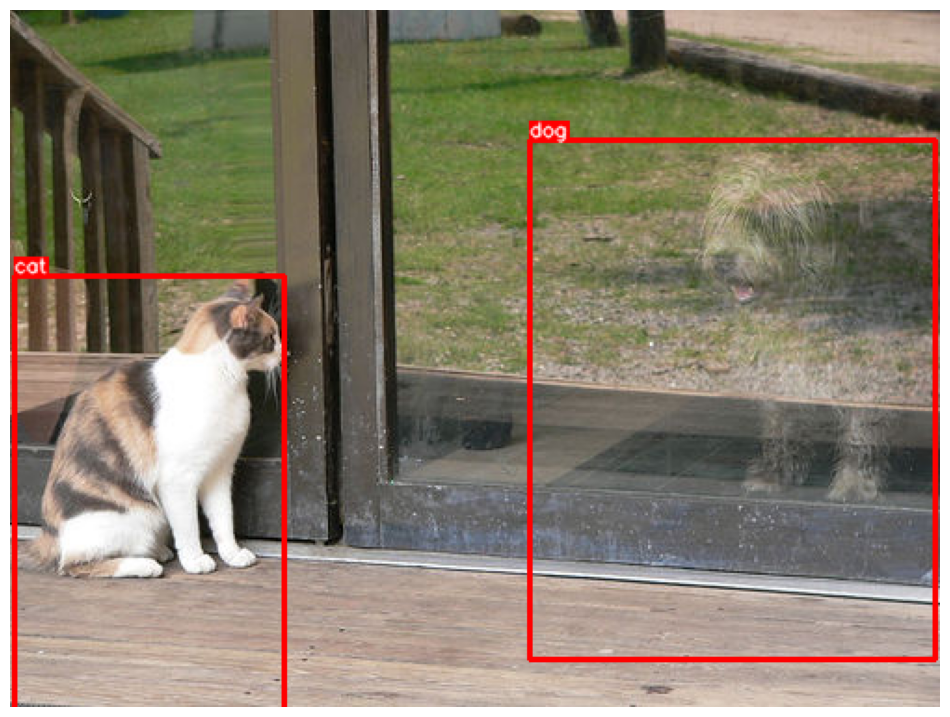

In [50]:
visualize(image, bboxes, category_ids, category_id_to_name, img_shape)

In [26]:
transform = A.Compose(
    [A.Rotate(p=1)],
    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']),
)

[[0.2762516736984253, 0.208397775888443, 0.4384844899177551, 0.416795551776886], [0.7062627673149109, 0.818798840045929, 0.4652332365512848, 0.3624023199081421]]
[0, 1]
0 0 0 0
0 0 0 0


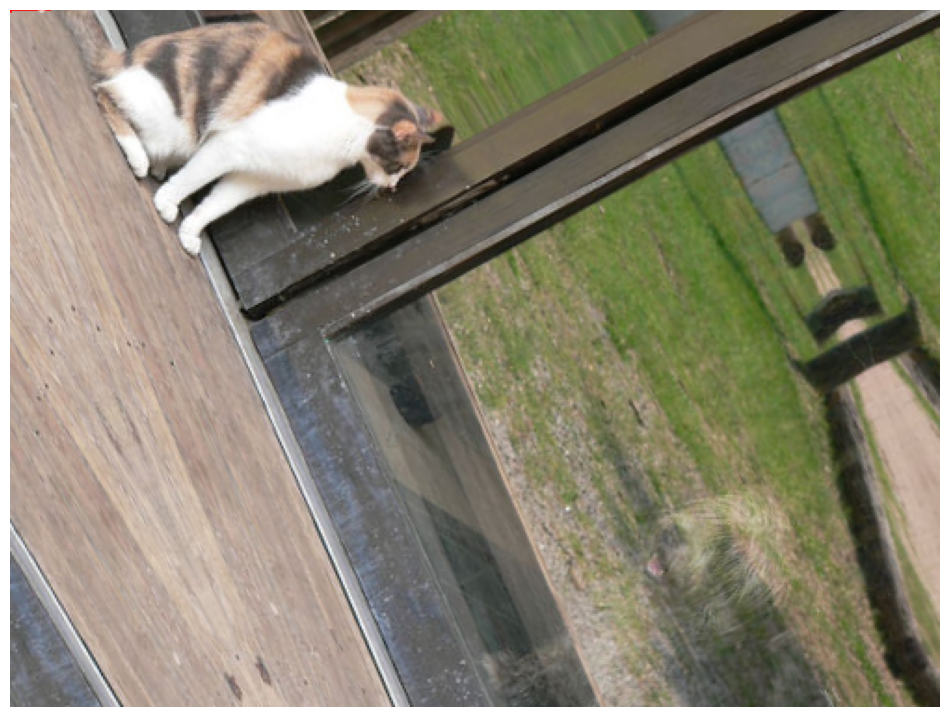

In [27]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)